In [6]:
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup

def getbsObj(url):
    try:
        html = urlopen(url)
    except HTTPError as e:
        return None
    try:
        bsObj = BeautifulSoup(html.read(), "lxml")
    except AttributeError as e:
        return None
    return bsObj

bsObj = getbsObj("http://www.pythonscraping.com/pages/warandpeace.html")


> `bsObj.findAll(tag, attributes, recursive, text, limit, keywords)`


### usually, in most cases, only use `tag` and `attributes`

#### tag : can pass python list, ex: `['h1', 'h2','h3','h4','h5','h6']`
#### attributes : can pass python dict as class name or id name, ex: `{'class':{'green', 'red'}}` 

In [15]:
nameList = bsObj.findAll('span', {'class':'green'})
for name in nameList:
    print(name.get_text())

Anna
Pavlovna Scherer
Empress Marya
Fedorovna
Prince Vasili Kuragin
Anna Pavlovna
St. Petersburg
the prince
Anna Pavlovna
Anna Pavlovna
the prince
the prince
the prince
Prince Vasili
Anna Pavlovna
Anna Pavlovna
the prince
Wintzingerode
King of Prussia
le Vicomte de Mortemart
Montmorencys
Rohans
Abbe Morio
the Emperor
the prince
Prince Vasili
Dowager Empress Marya Fedorovna
the baron
Anna Pavlovna
the Empress
the Empress
Anna Pavlovna's
Her Majesty
Baron
Funke
The prince
Anna
Pavlovna
the Empress
The prince
Anatole
the prince
The prince
Anna
Pavlovna
Anna Pavlovna


# children and descendants
> every children is descendant, but descendant is not certainly children

## only find children 
won't get the span or img tag

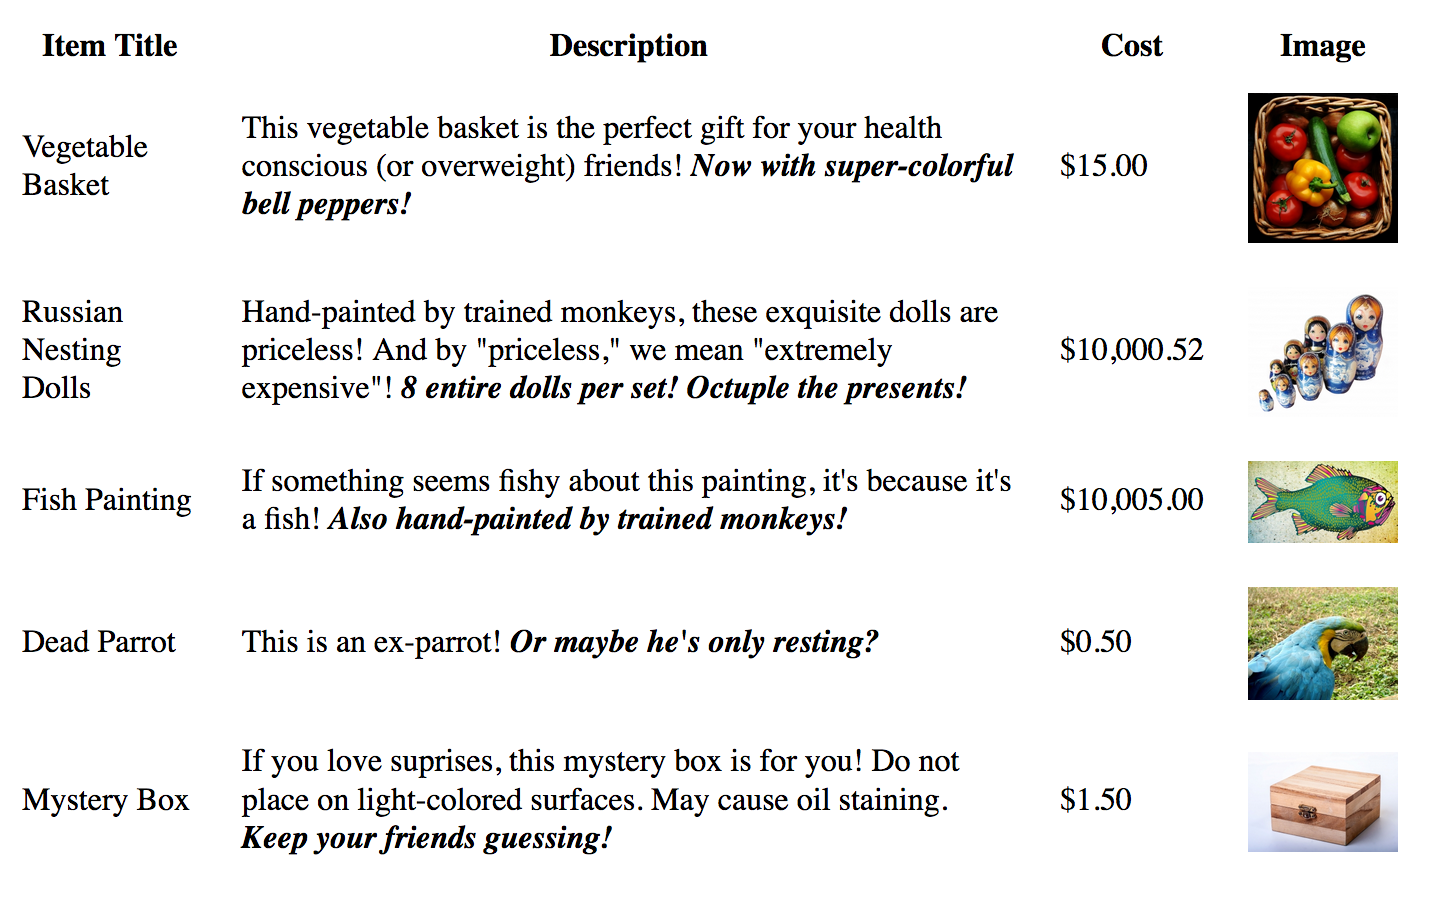

In [17]:
bsObj = getbsObj('http://www.pythonscraping.com/pages/page3.html')
for child in bsObj.find('table',{'id':'giftList'}).children:
    print(child)



<tr><th>
Item Title
</th><th>
Description
</th><th>
Cost
</th><th>
Image
</th></tr>


<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>


## siblings

In [18]:
for sibling in bsObj.find('table', {'id':'giftList'}).tr.next_siblings:
    print(sibling)



<tr class="gift" id="gift1"><td>
Vegetable Basket
</td><td>
This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
<span class="excitingNote">Now with super-colorful bell peppers!</span>
</td><td>
$15.00
</td><td>
<img src="../img/gifts/img1.jpg"/>
</td></tr>


<tr class="gift" id="gift2"><td>
Russian Nesting Dolls
</td><td>
Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
</td><td>
$10,000.52
</td><td>
<img src="../img/gifts/img2.jpg"/>
</td></tr>


<tr class="gift" id="gift3"><td>
Fish Painting
</td><td>
If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
</td><td>
$10,005.00
</td><td>
<img src="../img/gifts/img3.jpg"/>
</td></tr>


<tr class="gift" id="gift4"><td>
Dead Parrot
</td><td>
This is an ex-parr

* children and desendants
* siblings
* parents

---
# Regular Expression = [Regex](http://www.rexegg.com/regex-quickstart.html)

## email regex:
> `[A-Za-z0-9\._+]+@[A-Za-z]+\.(com|org|edu|net)`

In [19]:
import re

images = bsObj.find_all('img', {'src':re.compile('\.\.\/img\/gifts/img.*\.jpg')})
for image in images: 
    print(image['src'])

../img/gifts/img1.jpg
../img/gifts/img2.jpg
../img/gifts/img3.jpg
../img/gifts/img4.jpg
../img/gifts/img6.jpg


# Lambda
pass a func into another func, like
\begin{equation*}
f(g(x),y) \\
\text{or}
\end{equation*} 

\begin{equation*}
f(g(x),h(x)) \\
\end{equation*}




In [21]:
bsObj.find_all(lambda tag: len(tag.attrs) == 2)

[<img src="../img/gifts/logo.jpg" style="float:left;"/>,
 <tr class="gift" id="gift1"><td>
 Vegetable Basket
 </td><td>
 This vegetable basket is the perfect gift for your health conscious (or overweight) friends!
 <span class="excitingNote">Now with super-colorful bell peppers!</span>
 </td><td>
 $15.00
 </td><td>
 <img src="../img/gifts/img1.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift2"><td>
 Russian Nesting Dolls
 </td><td>
 Hand-painted by trained monkeys, these exquisite dolls are priceless! And by "priceless," we mean "extremely expensive"! <span class="excitingNote">8 entire dolls per set! Octuple the presents!</span>
 </td><td>
 $10,000.52
 </td><td>
 <img src="../img/gifts/img2.jpg"/>
 </td></tr>,
 <tr class="gift" id="gift3"><td>
 Fish Painting
 </td><td>
 If something seems fishy about this painting, it's because it's a fish! <span class="excitingNote">Also hand-painted by trained monkeys!</span>
 </td><td>
 $10,005.00
 </td><td>
 <img src="../img/gifts/img3.jpg"/>
 </td>